In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(20)

In [2]:
## defining kernel derivative function

def W2(x, l):
    R = np.abs(x) / l
    a = 1 / l
    mask1 = R <= 1
    mask2 = np.logical_and(R > 1, R < 2)
    result = np.zeros_like(R)
    result[mask1] = (2/3 - R[mask1]**2 + 0.5 * R[mask1]**3) * a
    result[mask2] = ((2 - R[mask2])**3) / 6 * a
    return result

def kernel(x,h):
    rr=np.abs(x)
    q=rr/h
    drx=x/(h*rr)
    alpha_=2/(3*h)
    mask1 = q < 1
    mask2 = np.logical_and(q >= 1, q < 2)
    # print(mask1.shape)
    result = np.zeros_like(q)
    result[mask1]=alpha_*(-3*q[mask1]+2.25*q[mask1]**2)*drx[mask1]
    result[mask2]=-alpha_*0.75*(2-q[mask2])**2*drx[mask2]
    return result

def alpha():
    return 1

In [3]:
### DEFINING CONSTANTS
T = 0.5               # Total time of integration
dt = 0.001          # Time step
N = int(T/dt)       # No of time points
a = 1               # Length of space
J = 512             # Space discretization points
d = 1.0/J
x = np.linspace(0,a,J)           # Discretization points

u0 = 0.25*np.sin(2*np.pi*x)
ut = np.zeros((J, N+1))
ut[:, 0] = u0

In [4]:
## defining constants
n_particles=J    ###  number of particles
dv = 1/n_particles   ### particle volume
rho0 = 1    ##### defining some random value of intial particle density
m_i = rho0*dv    ###### mass associated with each particle
c = 10/J    ###  radius/cutoff distance 
h = 1.2/J    ### smoothing length

#### creating neigbor list for particle
n_list = [ [] for i in range(n_particles) ]
x_dis = [ [] for i in range(n_particles) ]
for i in range(n_particles):
    for j in range(n_particles):
        if(i>j):
            k=-1
        else:
            k=1
        if(i!=j):
            if(np.linalg.norm(x[i]-x[j])<c):
                n_list[i].append(j)
                x_dis[i].append(x[i]-x[j])
            elif(a+dv-np.linalg.norm(x[i]-x[j])<c):
                n_list[i].append(j)
                x_dis[i].append(k*(a+dv-np.linalg.norm(x[i]-x[j])))
n_list=np.array(n_list)
x_dis=np.array(x_dis)

In [5]:
# WE'LL FIRST DEFINE A FUNCTION THAT CALCULATES THE SPATIAL DERIVATIVE USING CENTRAL DIFFERENCE
def SPH(c,h,n_list=n_list):
    cd=np.zeros_like(c)
    for i,neighbors in enumerate(n_list):
        c_i = c[i][np.newaxis]  # Broadcasting to create the necessary shape
        c_i = np.repeat(c_i, len(neighbors), axis=0)
        c_j=c[neighbors]
        cd[i] = np.dot((c_i-c_j), -(kernel(x_dis[i], h))) * dv
    return cd

In [11]:
for n in range(1, N+1):
    ud=SPH(ut[:, n-1],h)
    u=ut[:, n-1]
    rhs = np.einsum('i,i->i',u,alpha()*ud)
    ut[:, n] = ut[:, n-1] + rhs*dt
    print(f"Completed the {n}^th timestep")

Completed the 1^th timestep
Completed the 2^th timestep
Completed the 3^th timestep
Completed the 4^th timestep
Completed the 5^th timestep
Completed the 6^th timestep
Completed the 7^th timestep
Completed the 8^th timestep
Completed the 9^th timestep
Completed the 10^th timestep
Completed the 11^th timestep
Completed the 12^th timestep
Completed the 13^th timestep
Completed the 14^th timestep
Completed the 15^th timestep
Completed the 16^th timestep
Completed the 17^th timestep
Completed the 18^th timestep
Completed the 19^th timestep
Completed the 20^th timestep
Completed the 21^th timestep
Completed the 22^th timestep
Completed the 23^th timestep
Completed the 24^th timestep
Completed the 25^th timestep
Completed the 26^th timestep
Completed the 27^th timestep
Completed the 28^th timestep
Completed the 29^th timestep
Completed the 30^th timestep
Completed the 31^th timestep
Completed the 32^th timestep
Completed the 33^th timestep
Completed the 34^th timestep
Completed the 35^th tim

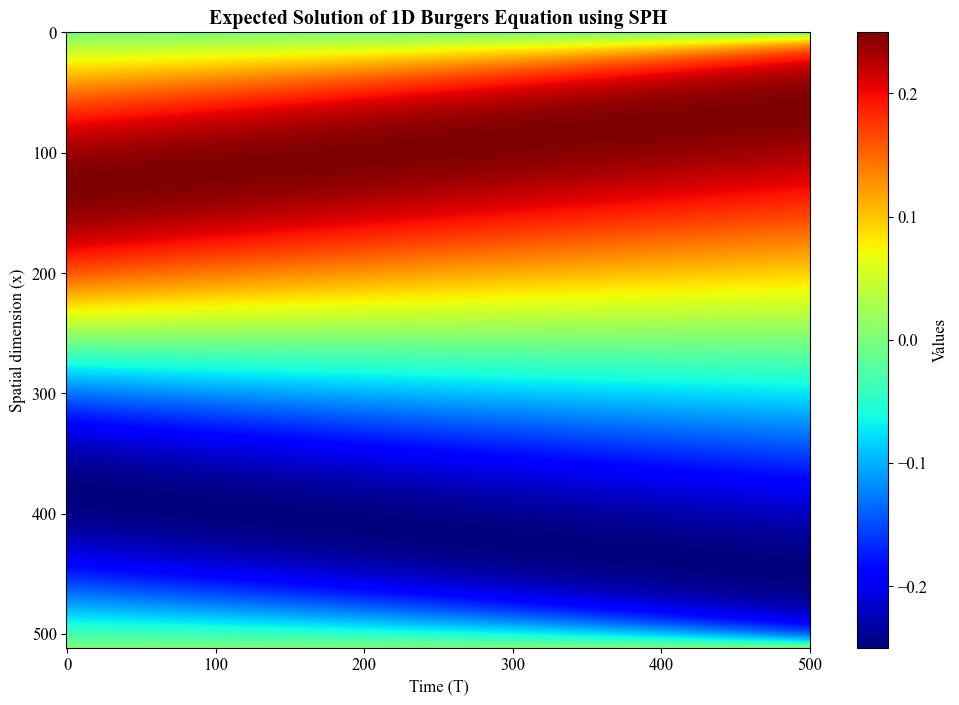

In [13]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(12,8), dpi=100)
heatmap=plt.imshow(ut, aspect='auto', cmap='jet')
plt.xlabel('Time (T)')
plt.ylabel('Spatial dimension (x)')
plt.title('Expected Solution of 1D Burgers Equation using SPH', fontweight='bold')
# Add colorbar with legend
cbar = plt.colorbar(heatmap)
cbar.set_label('Values')
plt.show()